# Book Sales Analysis

The file Books_Data_Clean.csv contains comprehensive information on book sales, ratings, and genres, including publishing year, author details, ratings, sales performance data, and genre classification



- Publishing Year: The year in which the book was published. (Numeric)
- Book Name: The title of the book. (Text)
- Author: The name of the author of the book. (Text)
- language_code: The code representing the language in which the book is written. (Text)
- Author_Rating: The rating of the author based on their previous works. (Numeric)
- Book_average_rating: The average rating given to the book by readers. (Numeric)
- Book_ratings_count: The number of ratings given to the book by readers. (Numeric)
- genre: The genre or category to which the book belongs. (Text)
- gross sales: The total sales revenue generated by a specific book. (Numeric)
- publisher revenue: The revenue earned by a publisher from selling a specific book. (Numeric)
- sale price: The price at which a specific book was sold. (Numeric)
- sales rank: The rank of a particular book based on its sale performance. (Numeric)
- units sold: The number of units sold for any particular book. (Numeric)

## Import Liberaies

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [19]:
Book_Data = pd.read_csv("Books_Data_Clean.csv")

In [52]:
Book_Data.head()

,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [21]:
Book_Data.drop("index",axis =1,inplace=True)

### check the no of columns and rows

In [22]:
print("shape :",Book_Data.shape)

shape : (1070, 14)


In [23]:
Book_Data.describe()

,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [27]:
Book_Data.columns

Index(['Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [29]:
Book_Data = Book_Data[Book_Data["Publishing Year"] >1900]

### Checking Null values

In [30]:
Book_Data.isnull().sum()

Publishing Year         0
Book Name              21
Author                  0
language_code          49
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [32]:
Book_Data.dropna(subset="Book Name",inplace=True)

In [33]:
Book_Data.isnull().sum()

Publishing Year         0
Book Name               0
Author                  0
language_code          47
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [35]:
Book_Data.duplicated().sum()

np.int64(0)

In [36]:
Book_Data.nunique()

Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

## Year Distribution

Text(0.5, 1.0, 'Distribution of publishing Year')

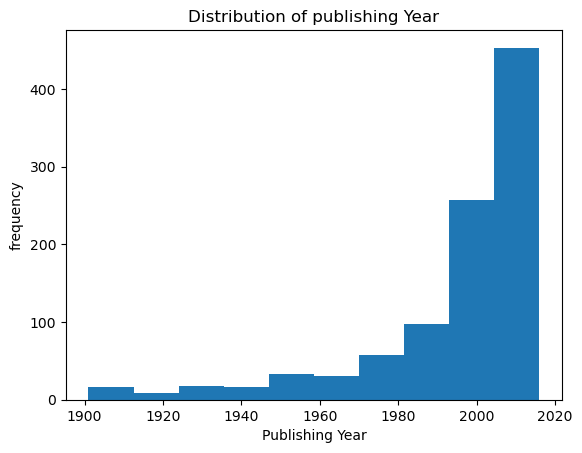

In [39]:
plt.hist(Book_Data["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("frequency")
plt.title("Distribution of publishing Year")

In [47]:
genre_count = Book_Data['genre'].value_counts()
genre_count


genre
genre fiction    759
nonfiction       160
fiction           54
children          15
Name: count, dtype: int64

<Axes: xlabel='genre', ylabel='count'>

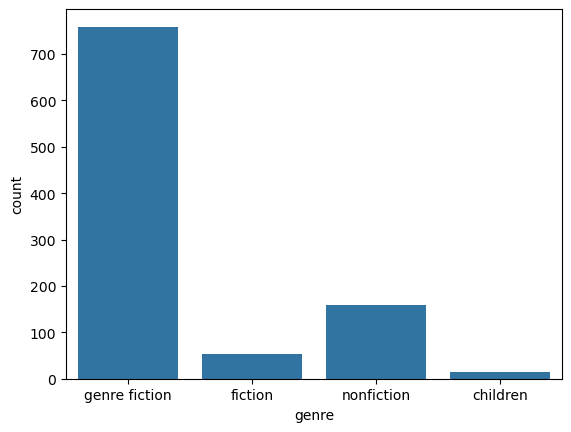

In [51]:
sns.countplot(data = Book_Data,x= "genre")

In [55]:
Book_Data.groupby("Book Name")["Book_average_rating"].mean().sort_values(ascending=False).head()

Book Name
Words of Radiance                                                4.77
A Court of Mist and Fury                                         4.72
The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury    4.65
The Way of Kings                                                 4.64
Calvin and Hobbes                                                4.61
Name: Book_average_rating, dtype: float64

In [57]:
Book_Data.columns

Index(['Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

<Axes: xlabel='genre', ylabel='Book_ratings_count'>

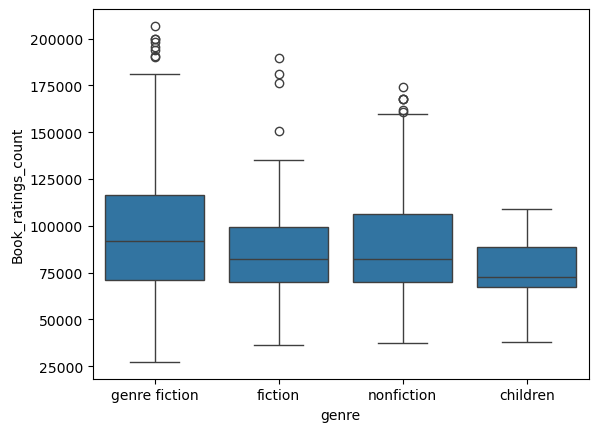

In [58]:
sns.boxplot(data = Book_Data,x = "genre",y= "Book_ratings_count")

<Axes: xlabel='sale price', ylabel='units sold'>

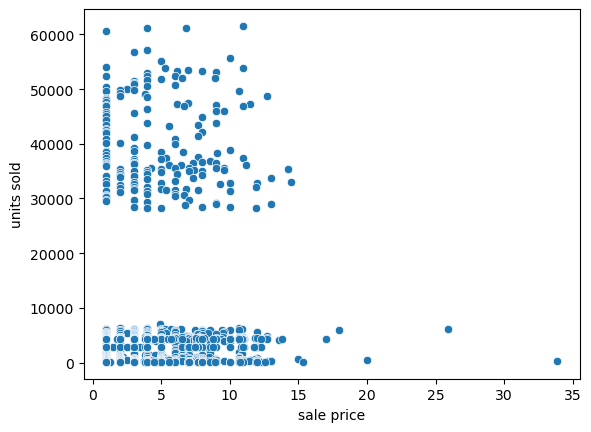

In [59]:
sns.scatterplot(data = Book_Data,x= "sale price",y= "units sold")

- where the Sales price is low the unit sold is increase


In [70]:
Book_Data["language_code"].value_counts()

language_code
eng      670
en-US    226
en-GB     29
en-CA      7
fre        4
spa        2
ara        2
nl         1
Name: count, dtype: int64

<Axes: xlabel='language_code', ylabel='count'>

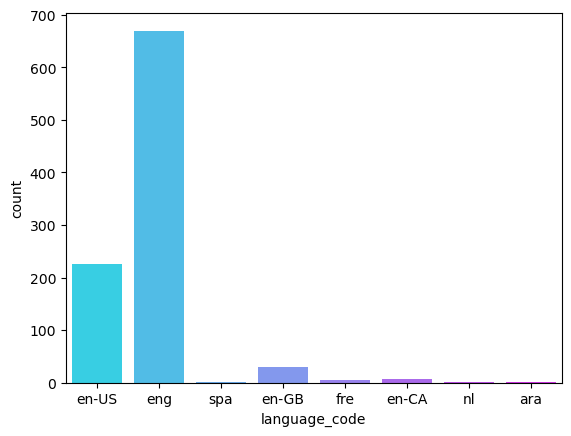

In [69]:
sns.countplot(data = Book_Data,x = "language_code",palette="cool")

Most books are used languages are **eng** then en-US

In [71]:
Book_Data.columns

Index(['Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

#### Which publisher get higher revenu based on their names

In [82]:
revenue = Book_Data.groupby("Publisher ")["publisher revenue"].sum()
revenue.sort_values(ascending =False)

Publisher 
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Amazon Digital Services,  Inc.          141767.772
HarperCollins Publishers                121769.814
Hachette Book Group                     107410.968
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

In [83]:
Book_Data.Author_Rating.value_counts()

Author_Rating
Intermediate    576
Excellent       336
Famous           48
Novice           28
Name: count, dtype: int64

### who are the Excellent Author

In [85]:
Book_Data[Book_Data.Author_Rating =="Excellent"]

,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
279,2003.0,æ¡œè˜­é«˜æ ¡ãƒ›ã‚¹ãƒˆéƒ¨ 1,Bisco Hatori,eng,Excellent,4.36,113881,genre fiction,666.65,399.990,1.99,299,HarperCollins Publishers,335
281,2012.0,"Fallen Too Far (Too Far, #1)",Abbi Glines,eng,Excellent,4.21,138871,genre fiction,2875.32,1725.192,8.82,304,Penguin Group (USA) LLC,326
284,2005.0,No Country for Old Men,Cormac McCarthy,eng,Excellent,4.12,100513,genre fiction,1611.77,967.062,4.99,306,Simon and Schuster Digital Sales Inc,323
286,1986.0,Howl's Moving Castle,Diana Wynne Jones,eng,Excellent,4.30,123945,genre fiction,950.82,0.000,2.99,309,"Amazon Digital Services, Inc.",318
289,1989.0,The Remains of the Day,Kazuo Ishiguro,eng,Excellent,4.10,105892,nonfiction,1874.87,1124.922,5.99,312,Random House LLC,313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,1982.0,Magician,Raymond E. Feist,en-US,Excellent,4.17,62432,genre fiction,815.14,489.084,7.69,1265,Random House LLC,106
1064,1994.0,Long Walk to Freedom: The Autobiography of Nel...,Nelson Mandela,eng,Excellent,4.31,43927,genre fiction,316.94,0.000,2.99,1266,"Amazon Digital Services, Inc.",106
1066,1989.0,The Power of One,Bryce Courtenay,eng,Excellent,4.34,57312,genre fiction,846.94,508.164,7.99,1270,Random House LLC,106
1068,2011.0,Night Road,Kristin Hannah,en-US,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106


In [91]:
Book_Data.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending=False)

Author_Rating
Intermediate    101400.272569
Famous           98295.250000
Novice           87318.464286
Excellent        83804.800595
Name: Book_ratings_count, dtype: float64

### Which Author get highest growth sale

In [99]:
growth_Sales = Book_Data.groupby("Author")["gross sales"].max().sort_values(ascending =False).head()
growth_Sales

Author
Harper Lee                47795.00
David Sedaris             41250.00
Laini Taylor              37952.50
Unknown, Seamus Heaney    34160.00
Charles Duhigg            27491.67
Name: gross sales, dtype: float64

<Axes: xlabel='Author'>

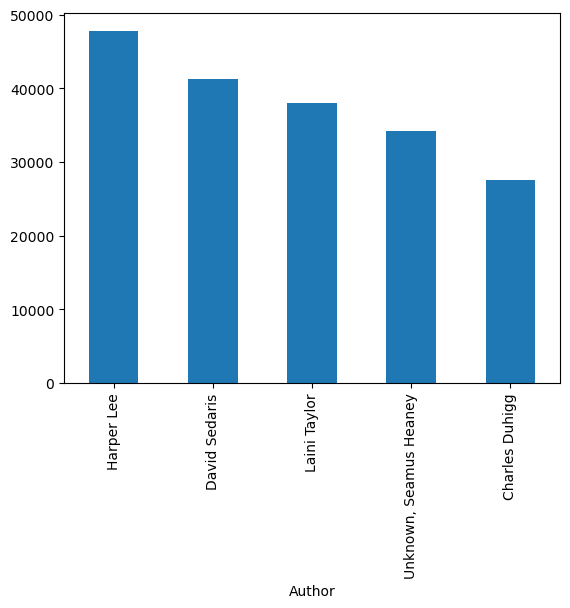

In [103]:
growth_Sales.plot(kind = "bar")

In [97]:
Book_Data.groupby("Book Name")["sales rank"].max().sort_values(ascending =False).head()

Book Name
Tripwire              1273
Night Road            1272
The Maltese Falcon    1271
The Power of One      1270
Gray Mountain         1268
Name: sales rank, dtype: int64

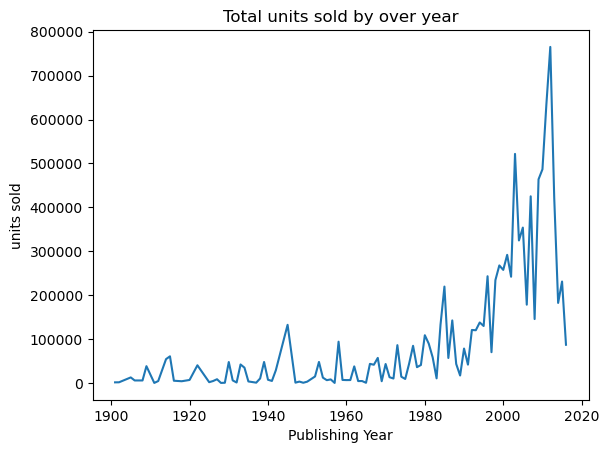

In [108]:
Book_Data.groupby("Publishing Year")["units sold"].sum().plot(kind = "line")
plt.xlabel("Publishing Year")
plt.ylabel("units sold")
plt.title("Total units sold by over year")
plt.show()

- The data shows a long-term upward trend in book sales from 1900 to 2015.

- The industry experiences:

   - Slow growth (1900–1950)

   -  growth (1950–1980)

   - Rapid expansion (1980–2015)

- After reaching a historical peak, there is a decline, possibly due to:

    - Shift to digital books

    - Changes in consumer behavior

    - Market saturation

    - Fewer blockbuster titles during the years after the peak